<a href="https://colab.research.google.com/github/mjfoster1313/Matts-Repo/blob/main/Week6_Homework_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import time

In [110]:
mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [112]:
print(mnist.data.shape)
print(mnist.target.shape)

(70000, 784)
(70000,)


In [113]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [114]:
x_train, x_test, y_train, y_test_ = train_test_split(mnist.data, mnist.target, test_size=1/7, random_state=42)

In [115]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test_.shape)


(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [116]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [117]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [118]:
from sklearn.decomposition import PCA
PCA = PCA(0.95)

In [119]:
x_train_pca = PCA.fit_transform(x_train)
x_test_pca = PCA.transform(x_test)

In [120]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs')
start_time = time.time()
log_reg.fit(x_train_pca, y_train)
end_time = time.time()
time_pca = (end_time - start_time)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [121]:
accuracy = log_reg.score(x_test_pca, y_test_)
print(accuracy)

0.9218


In [122]:
log_reg.predict(x_test_pca[11].reshape(1, -1))

array(['9'], dtype=object)

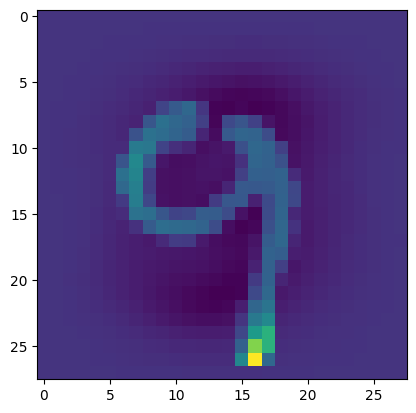

In [123]:
plt.imshow(x_test[11].reshape(28, 28))

In [124]:
start_time = time.time()
log_reg.fit(x_train, y_train)
end_time = time.time()
time_no_pca = (end_time - start_time)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [127]:
accuracy_no_pca = log_reg.score(x_test, y_test_)
print(accuracy_no_pca)

0.9163


In [128]:
print(f'Accuracy using PCA: {accuracy}')
print(f'Accuracy without PCA: {accuracy_no_pca}')
print(f'Time taken with PCA: {time_pca}')
print(f'Time taken without PCA: {time_no_pca}')

Accuracy using PCA: 0.9218
Accuracy without PCA: 0.9163
Time taken with PCA: 18.936906099319458
Time taken without PCA: 80.35473561286926
